## Get the data

Data source:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/downloads/suicide-rates-overview-1985-to-2016.zip/1

In [2]:
# import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [3]:
# Get the data
df = pd.read_csv('https://raw.githubusercontent.com/jeehobdata/projects/10263a60faee6d97ef79c3177dfdc7d6b1fdbb66/master.csv')


## Explore Data
### Data structure

In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


The data consists of 27820 instances and 12 features. Let's check the categorical attributes. 

### Categorical Attributes

In [6]:
df['age'].value_counts()

35-54 years    4642
55-74 years    4642
75+ years      4642
15-24 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

In [7]:
df['sex'].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [8]:
df['country-year'].value_counts()

Belize2008                12
Netherlands2002           12
Colombia2014              12
Sri Lanka1985             12
Thailand2015              12
Australia1992             12
Singapore2009             12
Austria2010               12
Japan1989                 12
Argentina1999             12
Estonia1996               12
Estonia2006               12
Finland1998               12
Belarus2007               12
Colombia1986              12
United Kingdom1997        12
Armenia1995               12
Switzerland2013           12
Slovakia2002              12
Belarus2001               12
Republic of Korea2003     12
Slovakia2009              12
Israel1996                12
Latvia2007                12
Russian Federation1993    12
Greece2003                12
Saint Lucia1998           12
France1988                12
Bahamas2002               12
Norway2010                12
                          ..
Latvia2011                12
Panama2009                12
France2000                12
Finland1987   

In [9]:
df['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [10]:
df['country'].value_counts()

Austria                   382
Iceland                   382
Netherlands               382
Mauritius                 382
Brazil                    372
Mexico                    372
United Kingdom            372
Argentina                 372
Singapore                 372
Puerto Rico               372
Colombia                  372
Chile                     372
Malta                     372
Italy                     372
Spain                     372
Greece                    372
Ecuador                   372
Japan                     372
Belgium                   372
Luxembourg                372
Israel                    372
Republic of Korea         372
United States             372
Bulgaria                  360
Norway                    360
Ireland                   360
France                    360
Guatemala                 360
Costa Rica                360
Australia                 360
                         ... 
Slovenia                  252
Belarus                   252
Switzerlan

In [11]:
df[' gdp_for_year ($) '].value_counts()

20,515,543,039       12
1,305,604,981,272    12
520,925,468,953      12
2,078,953,333,674    12
10,618,340,000       12
21,250,839,258       12
7,308,755,000,000    12
283,742,493,042      12
8,614,215,559        12
97,798,351,648       12
10,766,809,099       12
10,943,548,387       12
121,545,880,984      12
25,099,681,461       12
247,783,001,865      12
209,402,444,996      12
6,043,694,330        12
21,188,704,081       12
1,069,555,500,372    12
245,670,666,639      12
49,847,128,533       12
2,570,833,333        12
7,330,965,239        12
4,607,300,000        12
167,775,274,725      12
984,297,589          12
12,881,352,688       12
832,523,681,194      12
86,142,018,069       12
871,860,600          12
                     ..
676,949,594          12
16,374,393,900       12
825,977,889          12
178,706,717,753      12
86,283,126,844       12
1,401,465,923,172    12
236,038,384,442      12
49,209,523,810       12
147,607,982,695      12
18,881,765,437       12
236,357,519     

Change the data type of _' gdp_for_year ($) '_ as integer.

In [12]:
df_1 = df.copy()

In [13]:
df_1[' gdp_for_year ($) '] = df_1[' gdp_for_year ($) '].str.replace(',', '').apply(pd.to_numeric)

In [14]:
#Get rid of the spaces before and after the attribute name
df_1.rename(columns={' gdp_for_year ($) ':'gdp_for_year ($)'}, inplace=True)

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null int64
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


### Visualizing Data

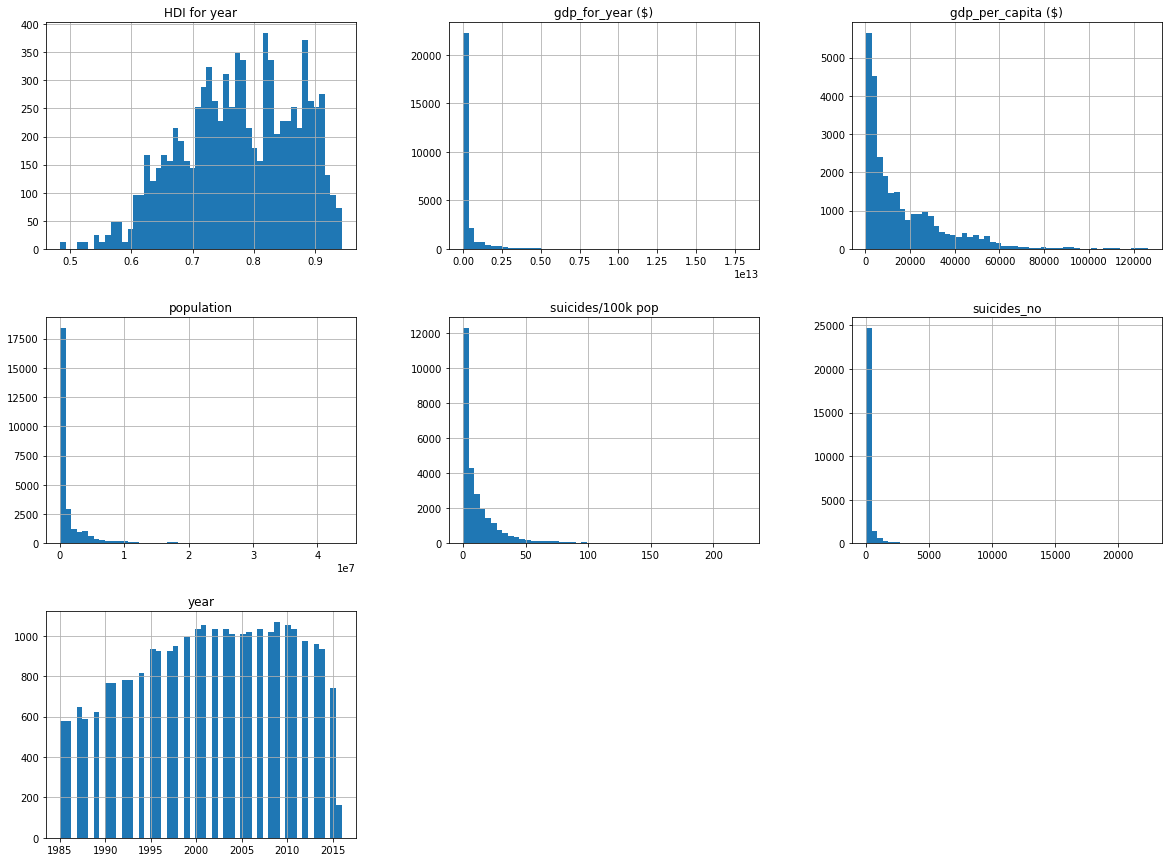

In [16]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_1.hist(bins=50, figsize=(20,15))
plt.show()

### Split the dataset 

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_1, test_size=0.2, random_state=42)

In [18]:
df_train_c = train_set.copy()

### Correlations


In [19]:
corr_matrix =df_train_c.corr()

corr_matrix["suicides/100k pop"].sort_values(ascending=False)

suicides/100k pop     1.000000
suicides_no           0.305368
HDI for year          0.068971
gdp_for_year ($)      0.022819
population            0.006271
gdp_per_capita ($)   -0.001522
year                 -0.041237
Name: suicides/100k pop, dtype: float64

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2D7DA7EB8>,
      dtype=object)

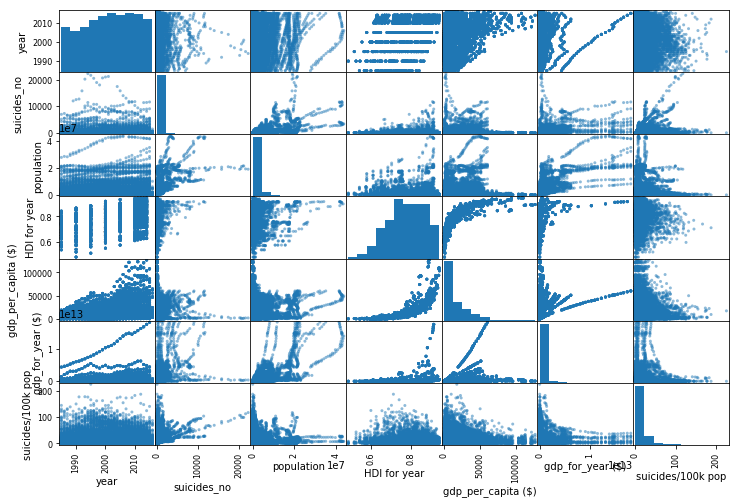

In [20]:
from pandas.tools.plotting import scatter_matrix
attributes = ["year", "suicides_no", "population",
    "HDI for year", "gdp_per_capita ($)","gdp_for_year ($)", "suicides/100k pop"]
scatter_matrix(df_train_c[attributes], figsize=(12, 8))

The list and plots show _HDI for year_ and _gdp_for_yesr ($)_ have some correlations with the target feature( _suidice/100k pop_ ). Even though the suicides_no and population show a high correlation, since the target attribute 'suicides/100k pop' is calculated by using those to feature, it will be disregarded. Let's close to take a look at the other to features. 

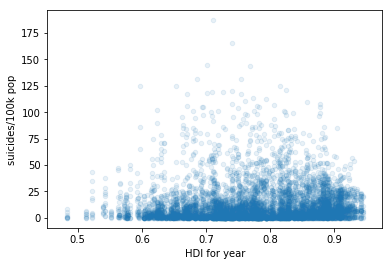

In [21]:
df_train_c.plot(kind="scatter", x="HDI for year", y="suicides/100k pop", alpha=0.1)

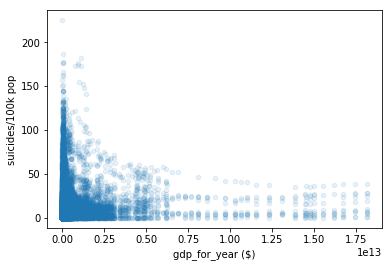

In [22]:
df_train_c.plot(kind="scatter", x="gdp_for_year ($)", y="suicides/100k pop", alpha=0.1)

As we can see, even though there is a week but, the _HDI for year_ shows a positive correlation on suicides ratio, while the _gdp for year ($)_ has a negative correlation.

## Data Cleaning


### Prepare the data for machine learning algorithm

To prepare the data for the machine learning algorithm, the copied train set should be separated into predictors and target variables. However, before doing that, let's drop the country-year attribute since the attribute overlaps the country and year attributes.  

In [23]:
# drop 'country-year' feature

df_train_c = df_train_c.drop('country-year', axis=1)

In [24]:
# check the dataframe after dropping the 'country-year' attribute
df_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22256 entries, 668 to 23654
Data columns (total 11 columns):
country               22256 non-null object
year                  22256 non-null int64
sex                   22256 non-null object
age                   22256 non-null object
suicides_no           22256 non-null int64
population            22256 non-null int64
suicides/100k pop     22256 non-null float64
HDI for year          6681 non-null float64
gdp_for_year ($)      22256 non-null int64
gdp_per_capita ($)    22256 non-null int64
generation            22256 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 2.0+ MB


Now, to avoid creating dummy variables of _country_ and _year_, I will index the dataframe by those two features. 

In [25]:
#Copy the train dataframe
df_train_c_in= df_train_c.copy()

In [26]:
# set the index
df_train_c_in.set_index(['country', 'year'], inplace=True)

In [27]:
# sort the index by country and year
df_train_c_in.sortlevel(['country', 'year'], ascending=[True, False])

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  


sex          age  suicides_no  population  \
country    year                                                 
Albania    2010  female  25-34 years            6      183579   
           2010    male   5-14 years            0      240939   
           2010    male  25-34 years            9      179720   
           2010    male  55-74 years           20      241852   
           2010  female  55-74 years            7      241491   
           2010    male    75+ years            2       50767   
           2010    male  35-54 years           20      371611   
           2010    male  15-24 years           10      279508   
           2010  female   5-14 years            2      223969   
           2010  female    75+ years            2       64415   
           2009    male    75+ years            0       47331   
           2009  female    75+ years            0       61582   
           2009  female  35-54 years            0      394286   
           2009  female  25-34 years            0      182712   
           2009    male  35-54 years            0      374365   
           2009    male  15-24 years            0      283448   
           2009  female  15-24 years            0      270003   
           2009  female  55-74 years            0      233302   
           2009    male   5-14 years            0      253007   
           2008  female   5-14 years            1      246288   
           2008  female  15-24 years           20      276073   
           2008  female  25-34 years            9      182663   
           2008  female  55-74 years            7      226448   
           2008    male  35-54 years           37      377119   
           2008    male  25-34 years           21      172855   
           2008    male   5-14 years            7      262464   
           2008  female  35-54 years           19      393832   
           2008    male  15-24 years           11      286702   
           2008    male    75+ years            2       44574   
           2007    male  15-24 years           13      288349   
...                 ...          ...          ...         ...   
Uzbekistan 1993  female  25-34 years           83     1763900   
           1993    male  25-34 years          278     1714500   
           1993  female  35-54 years           60     1656100   
           1992    male  25-34 years          258     1741600   
           1992    male  15-24 years          257     2079600   
           1992    male  35-54 years          308     1586100   
           1992  female    75+ years           29      232900   
           1992    male  55-74 years          105      701800   
           1991  female  55-74 years           57      856200   
           1991  female    75+ years           30      216200   
           1991    male  25-34 years          289     1648400   
           1991    male  55-74 years          119      668000   
           1991    male  35-54 years          353     1510300   
           1991  female  35-54 years           71     1531100   
           1991    male    75+ years           20      115500   
           1991    male  15-24 years          209     1970700   
           1991  female   5-14 years            7     2566500   
           1991  female  25-34 years           72     1684500   
           1991  female  15-24 years          117     1965200   
           1990    male   5-14 years           42     2574400   
           1990    male  35-54 years          343     1491700   
           1990    male  15-24 years          191     1955700   
           1990  female    75+ years           27      218400   
           1990  female   5-14 years           20     2524200   
           1990  female  15-24 years          135     1956300   
           1990  female  25-34 years           87     1664200   
           1990    male    75+ years           20      118300   
           1990  female  35-54 years          105     1507400   
           1990    male  25-34 years          283     1

Now, let's split the train set into predictors and target variables.

In [28]:
# separate the train set as sc_rates and labels as sc_rates_labels
sc_rates=df_train_c_in.drop("suicides/100k pop",axis=1)
sc_rates_labels=df_train_c_in["suicides/100k pop"].copy()

### Create dummy variables for the categorical attributes

In [38]:
# Use OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

sc_rates_cat = sc_rates[['sex', 'age', 'generation']]

cat_encoder = OneHotEncoder()
sc_rates_cat_1hot = cat_encoder.fit_transform(sc_rates_cat)
sc_rates_cat_1hot

<22256x14 sparse matrix of type '<class 'numpy.float64'>'
	with 66768 stored elements in Compressed Sparse Row format>

In [40]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
        '55-74 years', '75+ years'], dtype=object),
 array(['Boomers', 'G.I. Generation', 'Generation X', 'Generation Z',
        'Millenials', 'Silent'], dtype=object)]

### Fill the missing values 

Check if there are any rows with missing values.

In [41]:
sample_incomplete_rows = sc_rates[sc_rates.isnull().any(axis=1)].head()
sample_incomplete_rows

,,sex,age,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
country,year,,,,,,,,
Argentina,1991,female,25-34 years,77,2310000,NaN,189719984268,6404,Boomers
Fiji,2009,male,35-54 years,8,105083,NaN,2870624636,3765,Boomers
Romania,2015,male,5-14 years,11,1088177,NaN,177911101680,9431,Generation Z
Denmark,2007,female,5-14 years,0,334828,NaN,319423370134,62229,Generation Z
Argentina,2003,female,35-54 years,196,4402438,NaN,127586973492,3668,Boomers


Use Imputer from SKlearn to fill the null values.

In [42]:
# Use Imputer

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')

In [43]:
sc_rates_num = sc_rates.drop(['sex', 'age', 'generation'], axis=1)

In [44]:
imp.fit(sc_rates_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [47]:
# Create transformed numeric features
X = imp.transform(sc_rates_num)

#Put the transformed data back to the dataframe
sc_rates_tr = pd.DataFrame(X, columns=sc_rates_num.columns,
                         index = sc_rates.index)

In [48]:
sc_rates_tr.loc[sample_incomplete_rows.index.values]

suicides_no  population  HDI for year  gdp_for_year ($)  \
country   year                                                            
Argentina 1991         77.0   2310000.0         0.779      1.897200e+11   
          1991        398.0   3580000.0         0.779      1.897200e+11   
          1991        184.0    396000.0         0.779      1.897200e+11   
          1991         61.0   2689000.0         0.779      1.897200e+11   
          1991        169.0   2508000.0         0.779      1.897200e+11   
          1991         28.0   3369000.0         0.779      1.897200e+11   
          1991          9.0   3277000.0         0.779      1.897200e+11   
          1991        449.0   2130000.0         0.779      1.897200e+11   
          1991        179.0   2738000.0         0.779      1.897200e+11   
          1991        133.0   3691000.0         0.779      1.897200e+11   
          1991        214.0   2277000.0         0.779      1.897200e+11   
Fiji      2009          8.0    105083.0         0.779      2.870625e+09   
          2009          1.0     44642.0         0.779      2.870625e+09   
          2009          0.0      4522.0         0.779      2.870625e+09   
          2009          2.0     76305.0         0.779      2.870625e+09   
          2009          3.0     80908.0         0.779      2.870625e+09   
          2009          3.0     68110.0         0.779      2.870625e+09   
          2009          0.0     83083.0         0.779      2.870625e+09   
          2009          0.0     77600.0         0.779      2.870625e+09   
          2009          3.0     43403.0         0.779      2.870625e+09   
          2009          1.0      5809.0         0.779      2.870625e+09   
Romania   2015         11.0   1088177.0         0.779      1.779111e+11   
          2015        631.0   2065830.0         0.779      1.779111e+11   
          2015        129.0   2467460.0         0.779      1.779111e+11   
          2015        104.0   2818504.0         0.779      1.779111e+11   
          2015          4.0   1029722.0         0.779      1.779111e+11   
          2015         15.0   1060311.0         0.779      1.779111e+11   
          2015        123.0   1126484.0         0.779      1.779111e+11   
          2015         66.0    991307.0         0.779      1.779111e+11   
          2015         24.0   1307443.0         0.779      1.779111e+11   
          2015        189.0    578683.0         0.779      1.779111e+11   
Denmark   2007          0.0    334828.0         0.779      3.194234e+11   
          2007         15.0    345418.0         0.779      3.194234e+11   
          2007          2.0    351664.0         0.779      3.194234e+11   
          2007          6.0    305722.0         0.779      3.194234e+11   
          2007         55.0    606387.0         0.779      3.194234e+11   
          2007        124.0    584457.0         0.779      3.194234e+11   
          2007         56.0    347246.0         0.779      3.194234e+11   
          2007         59.0    146309.0         0.779      3.194234e+11   
Argentina 2003        196.0   4402438.0         0.779      1.275870e+11   
          2003         68.0   1044188.0         0.779      1.275870e+11   
          2003        179.0   3258029.0         0.779      1.275870e+11   
          2003         69.0   2859003.0         0.779      1.275870e+11   
          2003        577.0   2420864.0         0.779      1.275870e+11   
          2003        147.0   2854473.0         0.779      1.275870e+11   
          2003         25.0   3419258.0         0.779      1.275870e+11   
          2003        625.0   4237124.0         0.779      1.275870e+11   
          2003        456.0   2845955.0         0.779      1.275870e+11   
          2003        638.0   3331226.0         0.779      1.275870e+11   
          2003        272.0    581842.0         0.779      1.275870e+11   
          2003         37.0   3531507.0         0.779      1.275870e+11   

                gdp_per_capita ($)  
cou

In [50]:
imp.strategy

'median'

In [51]:
sc_rates_tr.head()

,,suicides_no,population,HDI for year,gdp_for_year ($),gdp_per_capita ($)
country,year,,,,,
Argentina,1991,77.0,2310000.0,0.779,1.897200e+11,6404.0
Paraguay,2005,40.0,575210.0,0.646,8.734654e+09,1704.0
Fiji,2009,8.0,105083.0,0.779,2.870625e+09,3765.0
Mexico,2013,16.0,1815829.0,0.755,1.274443e+12,11478.0
Romania,2015,11.0,1088177.0,0.779,1.779111e+11,9431.0


### Transformation Pipeline

Build a pipeline for processing of numeric attributes, and feature scaling. 

In [52]:
# Build a pipeline for numeric attributes 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

sc_rates_tr = num_pipeline.fit_transform(sc_rates_num)

In [54]:
sc_rates_tr

array([[-0.18180772,  0.11873742,  0.01251617, -0.17584803, -0.55484737],
       [-0.22246927, -0.32441505, -2.5937767 , -0.29938491, -0.80198115],
       [-0.25763602, -0.44450909,  0.01251617, -0.30338758, -0.69361036],
       ...,
       [-0.09608877,  0.70419711,  0.01251617, -0.10908456, -0.47523874],
       [-0.26642771, -0.46351331, -1.86871779, -0.30358037, -0.48112789],
       [ 0.03358862,  0.57770481,  0.48282465,  0.11303309, -0.02692754]])

In [56]:
# Build a full pipeline 

from sklearn.compose import ColumnTransformer

num_attribs = list(sc_rates_num)
cat_attribs = ['sex', 'age', 'generation']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

sc_rates_prepared = full_pipeline.fit_transform(sc_rates)


In [57]:
sc_rates_prepared

array([[-0.18180772,  0.11873742,  0.01251617, ...,  0.        ,
         0.        ,  0.        ],
       [-0.22246927, -0.32441505, -2.5937767 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25763602, -0.44450909,  0.01251617, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.09608877,  0.70419711,  0.01251617, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26642771, -0.46351331, -1.86871779, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03358862,  0.57770481,  0.48282465, ...,  0.        ,
         0.        ,  1.        ]])

In [59]:
# Check the shape of the prepared dataframe
sc_rates_prepared.shape

(22256, 19)

It includes 22256 rows and 19 columns.

## Select and train a model

### Training and Evaluating the training set

In [60]:
#select linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(sc_rates_prepared, sc_rates_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print("Predictions", reg.predict(sc_rates_prepared))

Predictions [ 4.87892617 18.2292972  20.35908627 ...  4.68305281  7.19757499
  7.33496693]


In [62]:
reg.score(sc_rates_prepared, sc_rates_labels)

0.36655005646812855

In [75]:
from sklearn.metrics import mean_squared_error
sc_rates_predictions = reg.predict(sc_rates_prepared)
mse = mean_squared_error(sc_rates_labels, sc_rates_predictions)
mse

229.32052799084087

It shows only 36.7% accuracy of the model with a high number of mse as 229.3. Let's try the Decision Tree Regression model.

In [70]:
#Use DecisionTree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(criterion = 'mse')
tree_reg.fit(sc_rates_prepared, sc_rates_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [76]:
sc_rates_predictions = tree_reg.predict(sc_rates_prepared)
tree_mse = mean_squared_error(sc_rates_labels, sc_rates_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.450962843994522e-17

In [72]:
tree_reg.score(sc_rates_prepared, sc_rates_labels)

1.0

The decision tree regression model result shows a much smaller number of errors as 4.45. However, the accuracy score shows as 100%! It could mean the model overfitting the train data. 

### Using Cross-Validation

Let's use cross validation to evaluate the model

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, sc_rates_prepared, sc_rates_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [81]:
# Check the results

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.07604627 3.93942101 2.42188083 1.84758111 3.14634007 2.22143161
 3.201584   2.600657   1.95864793 2.08914131]
Mean: 2.550273113434785
Standard deviation: 0.6416949014393594


Compute CV of the linear regression model to compare it 

In [89]:
lin_scores = cross_val_score(reg, sc_rates_prepared, sc_rates_labels,
    scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [15.22578919 15.62323066 14.55090955 14.54896884 15.82960985 14.53554214
 15.75718886 14.68144728 14.99696928 15.71093315]
Mean: 15.146058880843308
Standard deviation: 0.5210946303305906


Since cross-validation features expect a utility function rather than a cost function, it shows that the Decision Tree is overfitting and performs worse than the linear regression model.